# Machine Learning Project

----------------------------------------------------------------------------------------------------------------------------------------------------

## Imports

In [15]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import VotingClassifier


import utils
import pycountry

# Download NLTK resources
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Set seaborn style
sns.set(style="darkgrid")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Michael\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Michael\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
# Load the dataset
data = pd.read_csv('vaccination_all_tweets.csv')
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [14]:
data.shape

(228207, 16)

In [15]:
# Check for missing values
data.isnull().sum()


id                      0
user_name               2
user_location       66911
user_description    17018
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [16]:
# Removing duplicates
print("Initial number of rows:", len(data))
data.drop_duplicates(inplace=True)
print("Number of rows after removing duplicates:", len(data))

Initial number of rows: 228207
Number of rows after removing duplicates: 228207


In [17]:
# Function to clean text data

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove emojis
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Convert to lowercase
    text = text.lower()

    return text

# Apply cleaning function to 'text' column
data['cleaned_text'] = data['text'].apply(clean_text)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Michael\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


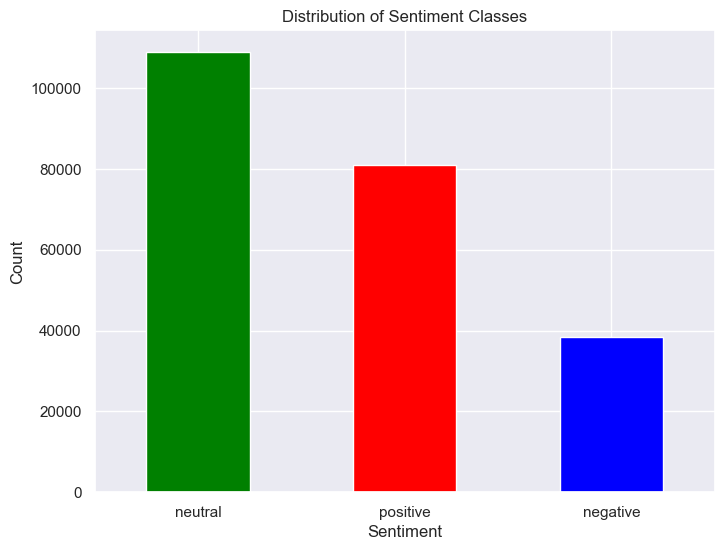

In [18]:


# Initialize VADER
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Function to get sentiment polarity
def get_sentiment(text):
    sentiment_score = sid.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to 'cleaned_text' column and create a new 'sentiment' column
data['sentiment'] = data['cleaned_text'].apply(get_sentiment)

# Count the occurrences of each sentiment class
sentiment_counts = data['sentiment'].value_counts()

# Plotting the distribution of sentiment classes

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [19]:
df1=pd.DataFrame(data)
df1.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,cleaned_text,sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,same folks said daikon paste could treat a cyt...,positive
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,while the world has been on the wrong side of ...,negative
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,coronavirus sputnikv astrazeneca pfizerbiontec...,positive
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,facts are immutable senator even when youre no...,neutral
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,explain to me again why we need a vaccine bori...,neutral


In [20]:

def extract_country(location):
    # Remove non-alphanumeric characters and extra spaces
    clean_location = re.sub(r'[^a-zA-Z0-9 ]', '', str(location))

    # Split the cleaned text into words
    words = clean_location.split()

    # Check if each word is a valid country name
    for word in words:
        for country in pycountry.countries:
            if word.lower() in [country.name.lower(), country.alpha_2.lower(), country.alpha_3.lower()]:
                return country.name

    return None

df1["user_location"] = df1["user_location"].apply(extract_country)

In [21]:
df1.isna().sum()
df1.shape

(228207, 18)

In [22]:
df1=df1.dropna()



In [23]:
label_encoder = LabelEncoder()
columns_to_encode = ["sentiment", "user_name", "user_location", 
                     "user_description", "hashtags", "source", 
                     "is_retweet"]

for column in columns_to_encode:
    df1[column] = label_encoder.fit_transform(df1[column])

In [24]:
df1_dummies = pd.get_dummies(df1['sentiment'], prefix='sentiment')

# Concatenate the dummy variables with the original DataFrame
df1 = pd.concat([df1, df1_dummies], axis=1)

In [25]:
df1.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,hashtags,source,retweets,favorites,is_retweet,cleaned_text,sentiment,sentiment_0,sentiment_1,sentiment_2
0,1340539111971516416,15141,95,2767,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,...,13261,140,0,0,0,same folks said daikon paste could treat a cyt...,2,0,0,1
6,1337851215875608579,7309,10,7088,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,...,21629,136,0,4,0,it is a bit sad to claim the fame for success ...,2,0,0,1
19,1337776763384958976,1101,30,13361,2010-01-24 04:43:57,125,442,5401,False,2020-12-12 15:10:09,...,3480,143,0,0,0,the trump administration failed to deliver on ...,0,1,0,0
27,1337769507402768384,12171,64,9244,2011-10-17 19:03:34,151,235,838,False,2020-12-12 14:41:19,...,13129,142,0,0,0,avgerinosmoscow pfizerbiontech fda approval ap...,2,0,0,1
28,1337765770420506625,6147,84,531,2019-07-29 20:03:23,75,291,685,False,2020-12-12 14:26:28,...,20976,142,0,0,0,interesting and very detailed article showing ...,2,0,0,1


C:\Users\Michael\AppData\Local\Temp\ipykernel_12108\1923320308.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


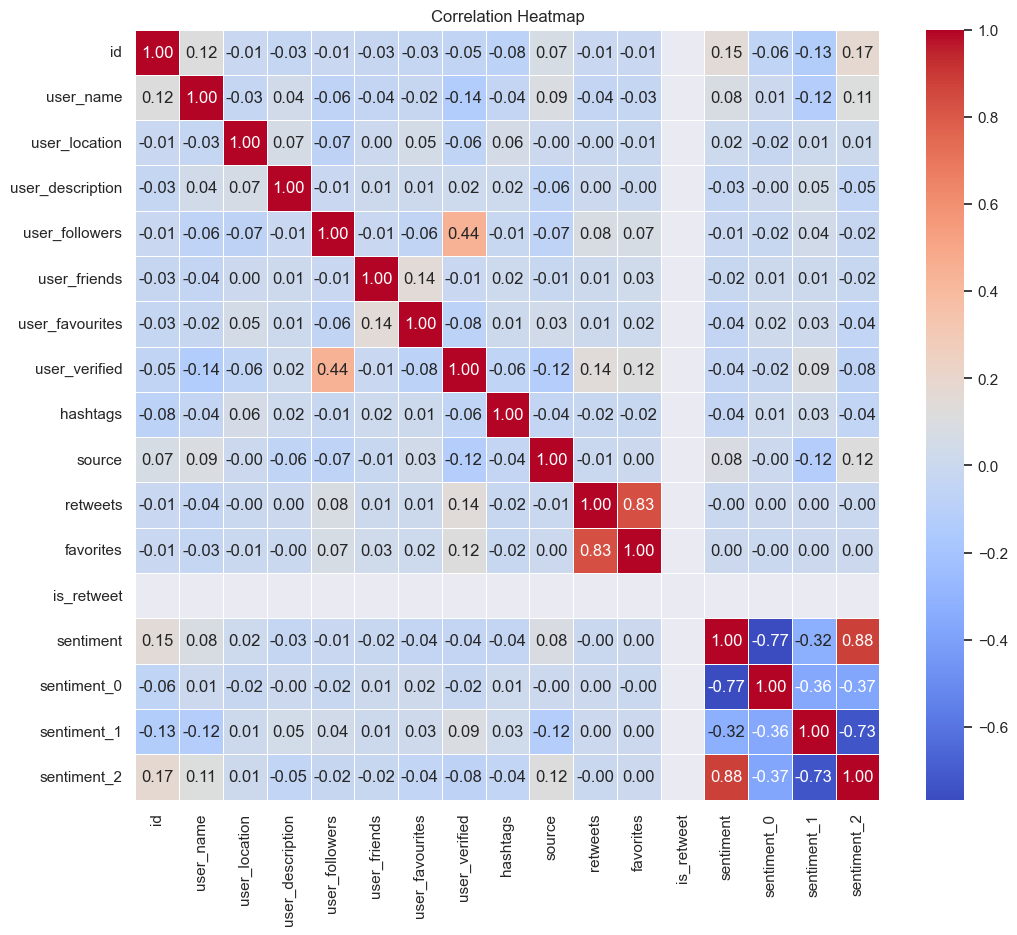

In [26]:
plt.figure(figsize=(12, 10))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
label_encoder = LabelEncoder()

data["encoded_sentiment"] = label_encoder.fit_transform(data["sentiment"])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data["cleaned_text"], data["encoded_sentiment"], test_size=0.2, random_state=42)

# TF-IDF vectorization
vectorization = TfidfVectorizer()
X_train_tfidf = vectorization.fit_transform(X_train)
X_test_tfidf = vectorization.transform(X_test)

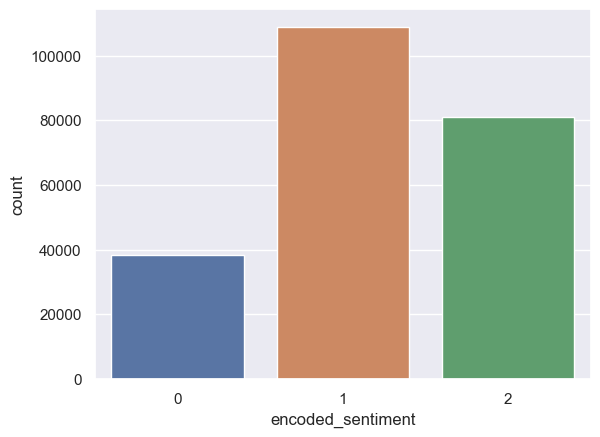

In [7]:

# Assuming 'y' is your target variable
sns.countplot(x= data["encoded_sentiment"])
plt.show()

In [21]:
undersample = RandomUnderSampler(random_state=42,sampling_strategy='auto')

X_train_resampled_u, y_train_resampled_u = undersample.fit_resample(X_train_tfidf, y_train)



oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_tfidf, y_train)


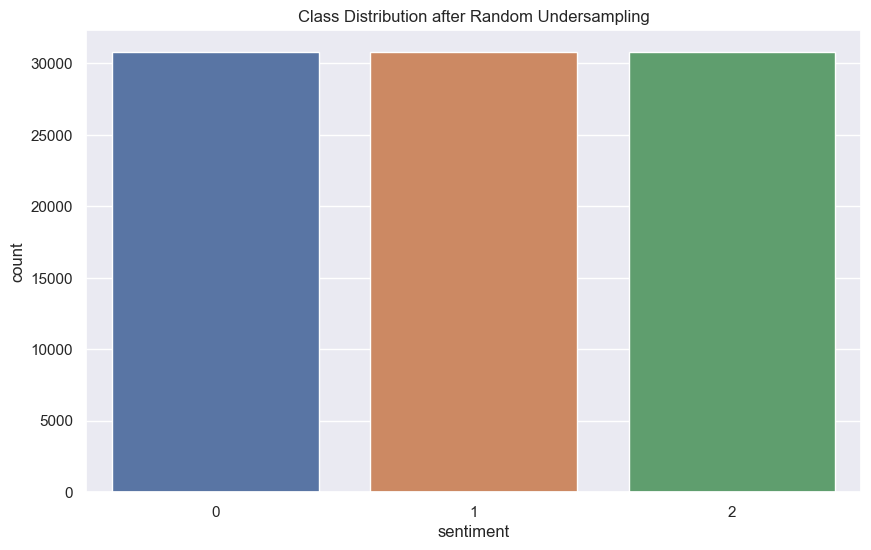

In [9]:
df_resampled_u = pd.DataFrame.sparse.from_spmatrix(X_train_resampled_u, columns=vectorization.get_feature_names_out())

df_resampled_u['sentiment'] = y_train_resampled_u

# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df_resampled_u)
plt.title('Class Distribution after Random Undersampling')
plt.show()

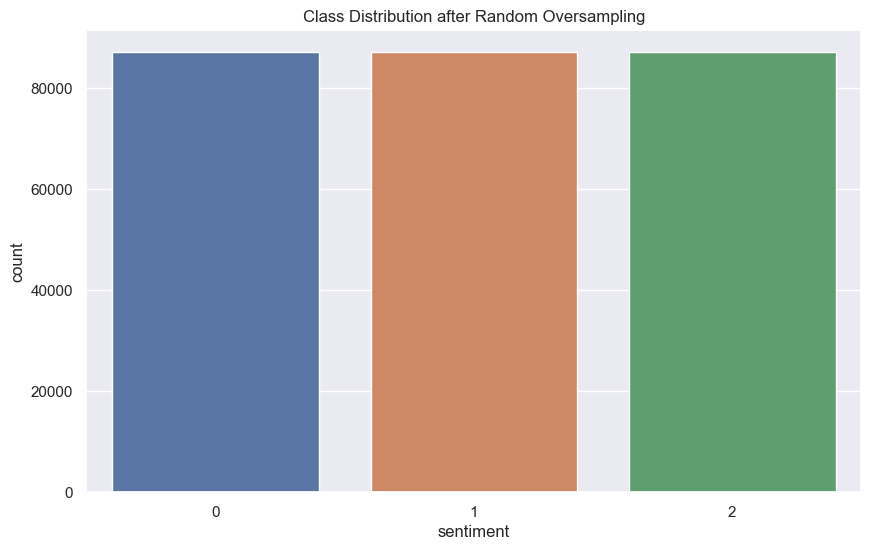

In [10]:
df_resampled = pd.DataFrame.sparse.from_spmatrix(X_train_resampled, columns=vectorization.get_feature_names_out())

df_resampled['sentiment'] = y_train_resampled

# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df_resampled)
plt.title('Class Distribution after Random Oversampling')
plt.show()

# MODELS

In [12]:
# naive_bayes

nb_classifier = MultinomialNB(alpha=0.1)

# Train the model with the resampled data
nb_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = nb_classifier.predict(X_test_tfidf)

nb_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {nb_accuracy:.2f}")

# Evaluate the model
print(classification_report(y_test, y_pred))

Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.52      0.82      0.64      7569
           1       0.95      0.67      0.79     21769
           2       0.74      0.83      0.78     16304

    accuracy                           0.75     45642
   macro avg       0.74      0.77      0.74     45642
weighted avg       0.80      0.75      0.76     45642



In [35]:
cv_scores = cross_val_score(nb_classifier, X_train_resampled, y_train_resampled, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2f}".format(cv_scores.mean()))

Cross-Validation Scores: [0.81456257 0.81123015 0.81913143 0.82577004 0.83749761]
Mean Accuracy: 0.82


In [22]:
# decision tree classifier 


# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test_tfidf)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {dt_accuracy}')

# Additional metrics for classification
print(classification_report(y_test, y_pred))



Accuracy: 0.8124315323605451
              precision    recall  f1-score   support

           0       0.67      0.65      0.66      7569
           1       0.84      0.89      0.86     21769
           2       0.84      0.79      0.82     16304

    accuracy                           0.81     45642
   macro avg       0.78      0.78      0.78     45642
weighted avg       0.81      0.81      0.81     45642



In [37]:
# decision tree classifier cross_val

cv_scores = cross_val_score(dt_classifier, X_train_resampled, y_train_resampled, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2f}".format(cv_scores.mean()))


Cross-Validation Scores: [0.88142565 0.88127033 0.90166443 0.91228238 0.95023914]
Mean Accuracy: 0.91


In [40]:
# Create a logistic regression model_LR

model_LR = LogisticRegression(C=5,max_iter=1000)

# Train the model_LR on the training set
model_LR.fit(X_train_resampled, y_train_resampled)



# Make predictions on the test set
y_pred = model_LR.predict(X_test_tfidf)

# Evaluate the model_LR
lr_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {lr_accuracy}')


Accuracy: 0.9433197493536655


In [45]:
cv_scores = cross_val_score(model_LR, X_train_resampled, y_train_resampled, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2f}".format(cv_scores.mean()))

Cross-Validation Scores: [0.95928909 0.95794911 0.96326765 0.96583126 0.97468911]
Mean Accuracy: 0.96


In [ ]:
# Gradient Boosting Classifier Model

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training set
gb_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test_tfidf)

# Evaluate the model
gb_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {gb_accuracy}')

# Additional metrics for classification
print(classification_report(y_test, y_pred))


Accuracy: 0.7411375487489593
              precision    recall  f1-score   support

           0       0.49      0.70      0.58      7569
           1       0.77      0.85      0.81     21769
           2       0.94      0.61      0.74     16304

    accuracy                           0.74     45642
   macro avg       0.73      0.72      0.71     45642
weighted avg       0.78      0.74      0.75     45642



In [ ]:

knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = knn_classifier.predict(X_test_tfidf)

# Evaluate the performance
knn_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {knn_accuracy:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# 3= 64

Accuracy: 0.66
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.33      0.48      7569
           1       0.59      0.97      0.73     21769
           2       0.90      0.40      0.55     16304

    accuracy                           0.66     45642
   macro avg       0.79      0.56      0.59     45642
weighted avg       0.75      0.66      0.63     45642



In [ ]:
# Create and train a Random Forest classifier


rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate the performance
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {rf_accuracy:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.65      0.73      7569
           1       0.83      0.94      0.88     21769
           2       0.87      0.81      0.84     16304

    accuracy                           0.85     45642
   macro avg       0.84      0.80      0.82     45642
weighted avg       0.85      0.85      0.84     45642



In [44]:

rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=1)
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf_classifier),
        ('nb', nb_classifier),
        ('knn', knn_classifier),
        ('gb', gb_classifier),
        ('logreg', model_LR),
        ('dt', dt_classifier)
    ],
    voting='soft'  # Soft voting for probabilities
)

ensemble_model.fit(X_train_resampled, y_train_resampled)

y_pred = ensemble_model.predict(X_test_tfidf)


accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy:.4f}')

Ensemble Model Accuracy: 0.8850


In [ ]:
# # Extra tree classifier 


# # Create a Extra tree classifier
# extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)


# # Train the model on the training set
# extra_trees_clf.fit(X_train_resampled, y_train_resampled)

# # Make predictions on the test set
# y_pred = extra_trees_clf.predict(X_test_tfidf)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy}')

# # Additional metrics for classification
# print(classification_report(y_test, y_pred))

Accuracy: 0.8800008763857851
              precision    recall  f1-score   support

           0       0.91      0.66      0.76      7569
           1       0.86      0.98      0.91     21769
           2       0.91      0.85      0.88     16304

    accuracy                           0.88     45642
   macro avg       0.89      0.83      0.85     45642
weighted avg       0.88      0.88      0.88     45642



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# List of models and their corresponding accuracy scores
models = ['Random Forest', 'KNN', 'Gradient Boosting', 'Logistic Regression', 'Decision Tree', 'Naive Bayes']
accuracies = [rf_accuracy, knn_accuracy, gb_accuracy, lr_accuracy, dt_accuracy, nb_accuracy]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1 for accuracy values

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')